In [30]:
from ddim import Diffusion, create_alpha_schedule
from predictor import BayesPredictor, train_predictor

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
USE_BAYES = True
DATASET = 'bimodal' # uniform, bimodal

In [42]:
def generate_data(batch_size, num_batches):
    if DATASET == 'uniform':
        return np.random.uniform(size=(num_batches, batch_size, 1))
    elif DATASET == 'bimodal':
        raw_data = 0.2 * np.random.uniform(size=(num_batches, batch_size, 1))
        offsets = np.random.randint(low=0, high=2, size=raw_data.shape).astype(raw_data.dtype)
        return raw_data - 0.1 + (offsets - 0.5) * 2
    else:
        raise ValueError(DATASET)

In [4]:
diffusion = Diffusion(create_alpha_schedule(num_steps=1000))

In [43]:
if USE_BAYES:
    model = BayesPredictor(diffusion, generate_data(1000, 1)[0])
else:
    data = generate_data(batch_size=1000, num_batches=1)
    print('mean', np.mean(data), 'std', np.std(data))
    model, losses = train_predictor(diffusion, data, lr=2e-3, use_bayes=True)
    plt.plot(losses)
    plt.show()
    print('final loss', np.mean(losses[-10:]))

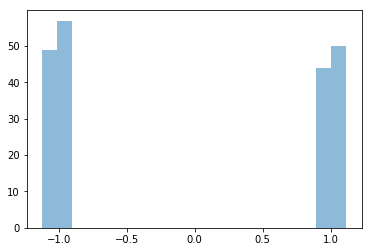

mean -0.06209658289179327 std 1.0038788763513564


In [44]:
x_T = np.random.normal(size=(200, 1))
samples = diffusion.ddpm_sample(x_T, model)
plt.hist(samples.reshape(-1), 20, alpha=0.5)
plt.show()

print('mean', np.mean(samples), 'std', np.std(samples))

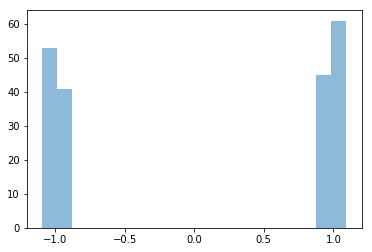

mean 0.05672678302139182 std 1.001550977472628


In [48]:
x_T = np.random.normal(size=(200, 1))
samples = diffusion.ddim_sample(x_T, model)
plt.hist(samples.reshape(-1), 20, alpha=0.5)
plt.show()

print('mean', np.mean(samples), 'std', np.std(samples))

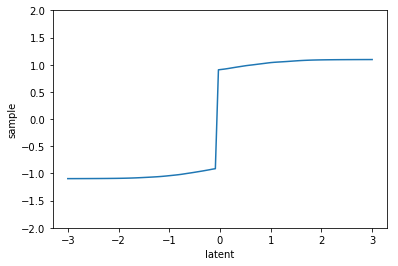

In [51]:
x_T = np.linspace(-3, 3, 100)
samples = diffusion.ddim_sample(x_T.reshape([-1, 1]), model)
plt.xlabel('latent')
plt.ylabel('sample')
plt.ylim(-2, 2)
plt.plot(x_T, samples)
plt.show()